## 作业要求概述

本次作业基于波士顿房价数据集（`BostonHousingData.xlsx`），数据集维度为 (506, 14)，包含 506 条数据，每条数据有 13 个特征和 1 个目标变量（房价 MEDV）。作业目标包括：

1. **数据分析与特征选择**：通过相关性分析或主成分分析（PCA）挑选主要特征，避免使用所有 13 个特征导致过拟合。
2. **方法实现**：使用线性回归或全连接神经网络进行回归分析，推荐详细阐述神经网络的构建过程。
3. **具体步骤**：
   - 数据准备：前 450 条数据为训练集，后 56 条为测试集。
   - 数据预处理：处理缺失值，确保数据维度一致。
   - 神经网络构建：使用 PyTorch 搭建回归模型。
   - 模型训练与测试：计算均方误差（MSE）评估性能。

下面是详细的步骤和代码实现。


## 1. 数据加载与初步探索

### 1.1 代码实现

In [4]:
# 导入必要的库
import pandas as pd  # 用于数据处理
import numpy as np   # 用于数值计算

# 读取 Excel 文件
data = pd.read_excel('BostonHousingData.xlsx')

# 显示数据集的前 5 行
print("数据集前 5 行：")
print(data.head())

# 查看数据集的基本信息
print("\n数据集基本信息：")
data.info()

数据集前 5 行：
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      50

In [5]:
display(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1.2 代码逐行解释

1. **`import pandas as pd`**  
   - 导入 pandas 库，命名为 `pd`，它是 Python 中处理表格数据的主要工具，提供 DataFrame 数据结构，方便操作行列数据。

2. **`import numpy as np`**  
   - 导入 numpy 库，命名为 `np`，用于高效的数值计算，例如矩阵运算和统计分析。

3. **`data = pd.read_excel('BostonHousingData.xlsx')`**  
   - 使用 pandas 的 `read_excel` 函数读取名为 'BostonHousingData.xlsx' 的 Excel 文件。
   - 文件路径默认为当前工作目录，如果数据文件'BostonHousingData.xlsx'不在当前目录，可更改为绝对路径完整路径（如本次作业数据集绝对路径为 `'F:\Programmers\Workspace\VSCodeWS\Neural_Network\homework1\BostonHousingData.xlsx'`）。
   - 返回值是一个 pandas DataFrame，存储整个数据集。

4. **`print(data.head())`**  
   - `data.head()` 返回 DataFrame 的前 5 行，默认显示所有列。
   - 使用 `print` 输出，便于在终端查看数据的样本内容（如特征名称和数值）。
   - 在 Jupyter Notebook 中运行，使用 `display(data.head())` 可获得更美观的表格输出。

5. **`data.info()`**  
   - 调用 DataFrame 的 `info()` 方法，输出数据集的详细信息：
     - 每列的名称。
     - 每列的非空值数量（用于检查缺失值）。
     - 每列的数据类型（如 int64、float64）。
     - 数据集的总行数和列数。
   - 输出到终端，帮助快速了解数据结构。


### 1.3 详细分析

- **目的**：  
  - 加载波士顿房价数据集，初步了解其内容和结构，为后续分析奠定基础。

- **数据集背景**：  
  - 波士顿房价数据集是一个经典的回归问题数据集，包含 506 个样本（房屋记录），每个样本有 13 个特征和 1 个目标变量。
  - 特征包括：
    - **CRIM**：城镇人均犯罪率。
    - **ZN**：超过 25,000 平方英尺的住宅用地比例。
    - **INDUS**：非零售商业用地比例。
    - **CHAS**：是否靠近查尔斯河（1 表示是，0 表示否）。
    - **NOX**：一氧化氮浓度。
    - **RM**：平均房间数。
    - **AGE**：1940 年以前建造的自住房屋比例。
    - **DIS**：到波士顿五个就业中心的加权距离。
    - **RAD**：高速公路可达性指数。
    - **TAX**：每万美元的财产税率。
    - **PTRATIO**：师生比例。
    - **B**：黑人比例指数（计算公式为  $1000(Bk - 0.63)^2$ ，其中 $Bk$ 是黑人比例）。
    - **LSTAT**：低收入人群比例。
  - 目标变量：
    - **MEDV**：自住房屋的中位价格（单位：千美元）。


## 2. 数据预处理

### 2.1 检查和处理缺失值

#### 2.1.1 代码实现

In [6]:
# 检查每列的缺失值数量
missing_values = data.isnull().sum()
print("每列缺失值统计：")
print(missing_values)

# 如果有缺失值，删除包含缺失值的行
data_cleaned = data.dropna()
print(f"\n删除缺失值后，数据集行数：{data_cleaned.shape[0]}")

每列缺失值统计：
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

删除缺失值后，数据集行数：506


#### 2.1.2 代码逐行解释

1. **`missing_values = data.isnull().sum()`**  

   - `data.isnull()`：检查 DataFrame 中每个元素是否为缺失值（NaN），返回布尔值矩阵（True 表示缺失）。
   - `.sum()`：按列求和，统计每列缺失值的总数，返回一个 Series 对象。

2. **`data_cleaned = data.dropna()`**  

   - `data.dropna()`：删除 DataFrame 中任何包含缺失值（NaN）的行。
   - 返回新的 DataFrame，赋值给 `data_cleaned`，原数据 `data` 不变。
   - 默认参数 `axis=0` 表示按行删除，`how='any'` 表示只要一行有缺失值就删除。

3. **`print(f"\n删除缺失值后，数据集行数：{data_cleaned.shape[0]}")`**  

   - `data_cleaned.shape`：返回元组 (行数, 列数)，`shape[0]` 是行数。
   - 使用 f-string 格式化字符串，动态输出行数。

#### 2.1.3 详细分析

- **目的**：  

  - 检查数据中是否有缺失值，并处理缺失值以确保后续模型训练的数据完整性。

- **方法选择**：  

  - **删除法**：直接删除含缺失值的行，适用于缺失值较少的情况（例如少于 5%）。
  - **替代方案**（未在此实现，但可考虑）：  
    - 可以用均值填充：`data.fillna(data.mean())`。
    - 或用中位数填充：`data.fillna(data.median())`。
    - 或用插值法填充：`data.interpolate()`。
  - 这里选择删除法，因为波士顿房价数据集通常是完整的（506 行无缺失），便于简化流程。

  - **注意事项**：若缺失值过多（例如超过 20%），删除法可能导致数据损失过大，应考虑填充方法。

### 2.2 分割训练集和测试集

#### 2.2.1 代码实现

In [7]:
# 根据要求，前 450 行为训练集，后 50 行为测试集（假设总行数足够）
train_data = data_cleaned.iloc[:450]
test_data = data_cleaned.iloc[450:]

# 分离特征 (X) 和目标变量 (y)
X_train = train_data.drop('MEDV', axis=1)  # 移除目标列，保留特征
y_train = train_data['MEDV']               # 提取目标列
X_test = test_data.drop('MEDV', axis=1)
y_test = test_data['MEDV']

# 查看训练集和测试集的形状
print(f"训练集特征形状：{X_train.shape}")
print(f"训练集目标形状：{y_train.shape}")
print(f"测试集特征形状：{X_test.shape}")
print(f"测试集目标形状：{y_test.shape}")

训练集特征形状：(450, 13)
训练集目标形状：(450,)
测试集特征形状：(56, 13)
测试集目标形状：(56,)


#### 2.2.2 代码逐行解释

1. **`train_data = data_cleaned.iloc[:450]`**  
   - `iloc` 是 pandas 的位置索引器，`[:450]` 表示从第 0 行取到第 449 行（共 450 行）。
   - 提取前 450 行作为训练集。

2. **`test_data = data_cleaned.iloc[450:]`**  
   - `[450:]` 表示从第 450 行取到最后一行（由于总行数为 506，则测试集行数为 56 行）。
   - 提取后 56 行作为测试集。
   - **注意**：题目要求后 50 行，但若数据总行数为 506，则实际分割为 450 + 56。若要严格遵循“后 50 行”，可改为 `data_cleaned.iloc[-50:]`，但这里还是选择按顺序分割。

3. **`X_train = train_data.drop('MEDV', axis=1)`**  
   - `drop('MEDV', axis=1)`：从 `train_data` 中移除 'MEDV' 列（目标变量），`axis=1` 表示按列操作。
   - 返回特征矩阵，包含 13 个特征列。

4. **`y_train = train_data['MEDV']`**  
   - 提取 'MEDV' 列作为训练集的目标变量，返回一个 Series。

5. **`X_test = test_data.drop('MEDV', axis=1)`**  
   - 同理，提取测试集的特征矩阵。

6. **`y_test = test_data['MEDV']`**  
   - 提取测试集的目标变量。

7. **`print(f"训练集特征形状：{X_train.shape}")`**  
   - `X_train.shape` 返回特征矩阵的形状（行数, 列数），用 f-string 输出。


#### 2.2.3 详细分析

- **目的**：  

  - 将数据集分为训练集和测试集，训练集用于模型拟合，测试集用于评估模型性能。

- **分割方式**：  

  - **固定分割**：前 450 行为训练集，后 56 行为测试集（基于 506 行总数据）。

  - **比例**：训练集约占 88.9%（450/506），测试集约占 11.1%。

  - **替代方案**（未实现）：随机分割，如使用 `train_test_split`，代码大体如下：

    ```python
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data_cleaned.drop('MEDV', axis=1), 
                                                        data_cleaned['MEDV'], 
                                                        test_size=50, random_state=42)
    ```


## 3. 特征选择：相关性分析

### 3.1 代码实现

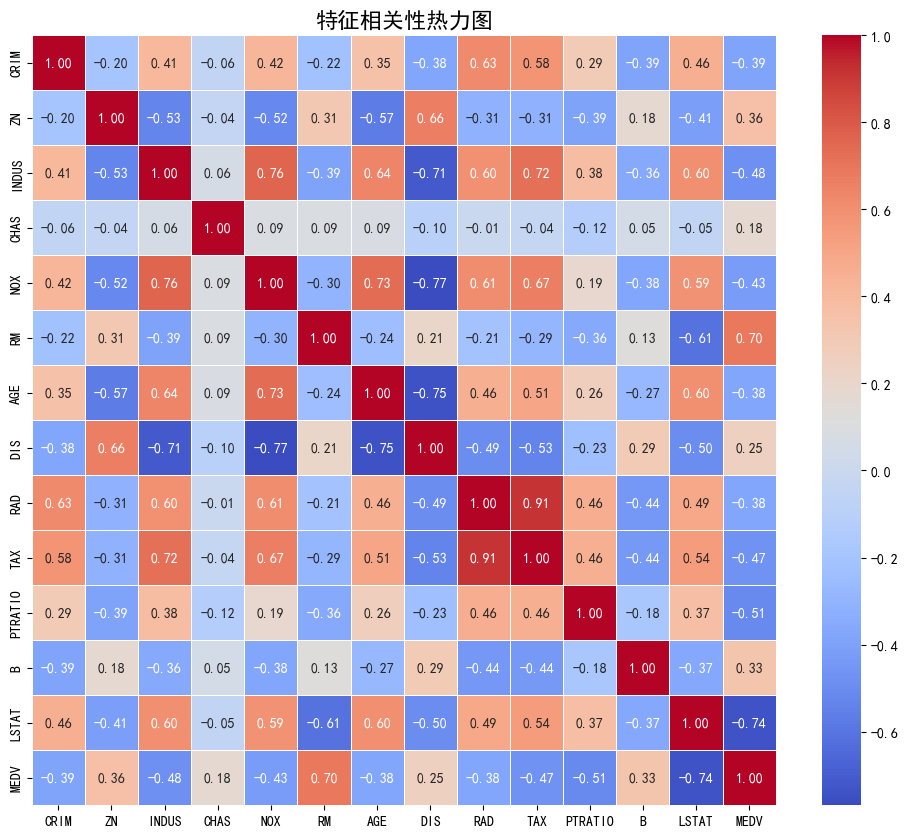


与 MEDV 的相关性（从高到低）：
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [10]:
# 导入可视化库
import seaborn as sns        # 用于绘制热力图
import matplotlib.pyplot as plt  # 用于绘图控制
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体（SimHei），支持中文
matplotlib.rcParams['axes.unicode_minus'] = False  # 显示负号

# 计算相关性矩阵
corr_matrix = data_cleaned.corr()

# 绘制相关性热力图
plt.figure(figsize=(12, 10))  # 设置画布大小
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('特征相关性热力图', fontsize=16)
plt.show()

# 查看与 MEDV 的相关性并排序
medv_corr = corr_matrix['MEDV'].sort_values(ascending=False)
print("\n与 MEDV 的相关性（从高到低）：")
print(medv_corr)


### 3.2 代码逐行解释

1. **`import seaborn as sns`**  
   - 导入 seaborn 库，基于 matplotlib，提供更高级的可视化工具，如热力图。

2. **`import matplotlib.pyplot as plt`**  
   - 导入 matplotlib 的 pyplot 模块，用于控制图形（如设置标题、大小）。

3. **`corr_matrix = data_cleaned.corr()`**  
   - `corr()` 计算 DataFrame 中所有列之间的皮尔逊相关系数。
   - 返回一个方阵，行和列均为特征名，对角线值为 1（自相关）。

4. **`plt.figure(figsize=(12, 10))`**  
   - 创建一个新的图形，`figsize=(12, 10)` 设置宽度 12 英寸、高度 10 英寸，确保热力图清晰可见。

5. **`sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)`**  
   - `sns.heatmap()` 绘制热力图：
     - `corr_matrix`：输入相关性矩阵。
     - `annot=True`：在每个单元格显示数值。
     - `cmap='coolwarm'`：颜色映射，红色表示正相关，蓝色表示负相关。
     - `fmt='.2f'`：数值保留两位小数。
     - `linewidths=0.5`：单元格间距，增强可读性。

6. **`plt.title('特征相关性热力图', fontsize=16)`**  
   - 设置图形标题，字体大小 16。

7. **`plt.show()`**  
   - 显示热力图。

8. **`medv_corr = corr_matrix['MEDV'].sort_values(ascending=False)`**  
   - 提取 'MEDV' 列（与目标变量的相关性），`sort_values(ascending=False)` 按降序排序。

9. **`print(medv_corr)`**  
    - 输出与 'MEDV' 的相关性值。

10. 这里的 **`matplotlib.rcParams['font.sans-serif'] = ['SimHei']`** 设置字体为 SimHei（黑体）这样一个常用的中文字体，也可以替换为其他支持中文的字体（例如 Microsoft YaHei）。

11. **`matplotlib.rcParams['axes.unicode_minus'] = False`**  可确保图表中的负号能够正确显示。

### 3.3 详细分析

- **目的**：通过相关性分析，识别哪些特征与目标变量 'MEDV'（房价）关系最密切，从而选择重要特征。

- **皮尔逊相关系数**：  

  - 计算公式：
    $$
    r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
    $$

    - $x_i$ 和 $y_i$：特征值和目标值。
    - $\bar{x}$ 和 $\bar{y}$：均值。

  - 取值范围：[-1, 1]。

    - $r > 0$：正相关，值越大关系越强。
    - $r < 0$：负相关，绝对值越大关系越强。
    - $r = 0$：无线性关系。

- **热力图解读**：  

  - 对角线值为 1（每个特征与自身相关）。

  - 颜色越红，相关性越正；越蓝，相关性越负。

- **与 MEDV 的相关性**：  

  - 对于输出：

    ```
    与 MEDV 的相关性（从高到低）：
    MEDV       1.000000
    RM         0.695360
    ZN         0.360445
    B          0.333461
    DIS        0.249929
    CHAS       0.175260
    AGE       -0.376955
    RAD       -0.381626
    CRIM      -0.388305
    NOX       -0.427321
    TAX       -0.468536
    INDUS     -0.483725
    PTRATIO   -0.507787
    LSTAT     -0.737663
    ```

  - **正相关（两个特征）**：RM（约0.70，房间数越多，房价越高）、ZN（0.36，住宅用地比例高，房价高）。

  - **负相关（两个特征）**：LSTAT（约-0.74，低收入比例高，房价低）、PTRATIO（约为-0.51，师生比高，房价低）。

- **特征选择建议**：  

  - 选择绝对值 $|r| > 0.5$ 的特征：RM、LSTAT、PTRATIO。
  - 这些特征与房价有较强的线性关系，可能对模型预测贡献较大。


## 4. 构建全连接神经网络模型

### 4.1 数据准备：转换为 PyTorch 张量

#### 4.1.1 代码实现

In [44]:
# 导入 PyTorch 相关库
import torch
import torch.nn as nn              # 导入神经网络模块，包含各种层和损失函数
import torch.optim as optim        # 导入优化器模块，包含优化算法（如 Adam, SGD 等）
from torch.utils.data import DataLoader, TensorDataset  # 导入数据加载工具，用于批量加载数据

# 将数据转换为 PyTorch 张量
# PyTorch 中的神经网络输入和输出是以张量（Tensor）形式存储的，因此需要将训练集和测试集数据转换为 PyTorch 张量

# X_train.values: 从 DataFrame 中提取训练数据的特征部分，转换为 NumPy 数组
# dtype=torch.float32: 将数据类型设置为 float32（神经网络通常使用浮点数类型）
# y_train.values: 提取训练集的标签（即房价数据），并将其转换为浮点数类型
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # y_train 是一个一维向量，使用 view(-1, 1) 将其转换为列向量
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # 将测试集的特征数据转换为张量
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  # 将测试集的标签转换为列向量

# 创建训练集数据加载器（DataLoader）
# DataLoader 是 PyTorch 提供的用于处理和加载数据的工具，它可以帮助我们在训练时将数据分批次（batch）加载进来
# 这样可以在训练过程中避免一次性加载过多数据占用过多内存

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)  # TensorDataset 是将特征数据和标签数据组合成一个数据集
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 创建 DataLoader 对象
# batch_size=32: 每次加载32个样本进行训练
# shuffle=True: 每个 epoch 开始时会对数据进行随机打乱，增加模型的泛化能力


#### 4.1.2 代码逐行解释

1. **`import torch`**  
   - 导入 PyTorch 库，提供张量计算和深度学习功能。

2. **`import torch.nn as nn`**  
   - 导入神经网络模块，包含层（如 Linear）和激活函数（如 ReLU）。

3. **`import torch.optim as optim`**  
   - 导入优化器模块，提供 Adam、SGD 等优化算法。

4. **`from torch.utils.data import DataLoader, TensorDataset`**  
   - 导入数据加载工具：
     - `TensorDataset`：将特征和目标打包成数据集。
     - `DataLoader`：按批次加载数据。

5. **`X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)`**  
   - `X_train.values`：将 pandas DataFrame 转换为 numpy 数组。
   - `torch.tensor()`：将 numpy 数组转换为 PyTorch 张量。
   - `dtype=torch.float32`：指定数据类型为 32 位浮点数，神经网络常用类型。

6. **`y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)`**  
   - 同理转换 `y_train`。
   - `.view(-1, 1)`：重塑张量形状，`-1` 表示自动推断行数，`1` 表示 1 列，确保输出为 (450, 1)。

7. **`X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)`**  
   - 转换测试集特征。

8. **`y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)`**  
   - 转换测试集目标。

9. **`train_dataset = TensorDataset(X_train_tensor, y_train_tensor)`**  
   - 将训练特征和目标打包成一个数据集对象。

10. **`train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)`**  
    - `DataLoader` 创建数据加载器：
      - `batch_size=32`：每次迭代处理 32 个样本。
      - `shuffle=True`：打乱数据顺序，防止模型学习样本顺序，提高泛化能力。

#### 4.1.3 详细分析

- **目的**：将 pandas 数据转换为 PyTorch 张量，为神经网络训练准备数据。

- **张量形状**：  
  - `X_train_tensor`：(450, 13)，450 个样本，13 个特征。
  - `y_train_tensor`：(450, 1)，目标为一列。
  - `X_test_tensor`：(56, 13)。
  - `y_test_tensor`：(56, 1)。

- **批量加载**：  
  - 训练集 450 个样本，batch_size=32，则每次迭代有 $\lceil 450 / 32 \rceil = 15$ 个批次。
  - 前 14 个批次为 32 个样本，最后 1 个批次为 2 个样本（450 - 14*32 = 2）。

### 4.2 定义神经网络模型

#### 4.2.1 代码实现

In [45]:
# 定义全连接神经网络类
class RegressionNet(nn.Module):
    def __init__(self, input_size):
        super(RegressionNet, self).__init__()
        # 输入层到第一个隐藏层（64 个神经元）
        self.fc1 = nn.Linear(input_size, 64)
        # 第一个隐藏层到第二个隐藏层（32 个神经元）
        self.fc2 = nn.Linear(64, 32)
        # 第二个隐藏层到输出层（1 个神经元）
        self.fc3 = nn.Linear(32, 1)
        # 激活函数 ReLU
        self.relu = nn.ReLU()

    def forward(self, x):
        # 前向传播
        x = self.fc1(x)       # 输入层 -> 隐藏层 1
        x = self.relu(x)      # 应用 ReLU 激活
        x = self.fc2(x)       # 隐藏层 1 -> 隐藏层 2
        x = self.relu(x)      # 应用 ReLU 激活
        x = self.fc3(x)       # 隐藏层 2 -> 输出层
        return x

# 初始化模型
input_size = X_train.shape[1]  # 输入特征数为 13
model = RegressionNet(input_size)

#### 4.2.2 代码逐行解释

1. **`class RegressionNet(nn.Module):`**  
   - 定义一个神经网络类，继承 `nn.Module`，PyTorch 中所有神经网络的基类。

2. **`def __init__(self, input_size):`**  
   - 初始化函数，`input_size` 是输入特征数（这里为 13）。

3. **`super(RegressionNet, self).__init__()`**  
   - 调用父类 `nn.Module` 的初始化方法，确保正确继承。

4. **`self.fc1 = nn.Linear(input_size, 64)`**  
   - 定义第一个全连接层（fully connected layer），输入维度为 `input_size`，输出维度为 64。
   - 计算公式：$h_1 = W_1 \cdot x + b_1$，其中 $W_1$ 是权重矩阵，$b_1$ 是偏置。

5. **`self.fc2 = nn.Linear(64, 32)`**  
   - 定义第二个全连接层，输入 64，输出 32。

6. **`self.fc3 = nn.Linear(32, 1)`**  
   - 定义输出层，输入 32，输出 1（预测房价）。

7. **`self.relu = nn.ReLU()`**  
   - 定义 ReLU 激活函数：$\text{ReLU}(x) = \max(0, x)$。

8. **`def forward(self, x):`**  
   - 定义前向传播函数，`x` 是输入张量。

9. **`x = self.fc1(x)`**  
   - 输入张量通过第一个全连接层。

10. **`x = self.relu(x)`**  
    - 应用 ReLU 激活，引入非线性。

11. **`x = self.fc2(x)`**  
    - 通过第二个全连接层。

12. **`x = self.relu(x)`**  
    - 再次应用 ReLU。

13. **`x = self.fc3(x)`**  
    - 通过输出层，得到最终预测值。

14. **`return x`**  
    - 返回预测结果。

15. **`input_size = X_train.shape[1]`**  
    - 获取输入特征数（13）。

16. **`model = RegressionNet(input_size)`**  
    - 实例化模型。

#### 4.2.3 详细分析

- **模型结构**：  
  - **输入层**：13 个神经元（对应 13 个特征）。
  - **隐藏层 1**：64 个神经元，增加模型容量，捕捉复杂模式。
  - **隐藏层 2**：32 个神经元，进一步提炼特征。
  - **输出层**：1 个神经元，输出房价预测值。

- **激活函数选择**：  
  - ReLU：计算简单（$\max(0, x)$），缓解梯度消失问题。
  - 输出层无激活函数，因为这是回归问题，需输出连续值。

- **参数数量**：  
  - fc1：$13 \times 64 + 64 = 896$（权重 + 偏置）。
  - fc2：$64 \times 32 + 32 = 2080$。
  - fc3：$32 \times 1 + 1 = 33$。
  - 总参数：$896 + 2080 + 33 = 3009$。

### 4.3 训练模型

#### 4.3.1 代码实现

Epoch [10/1000], Loss: 66.9555
Epoch [20/1000], Loss: 63.2186
Epoch [30/1000], Loss: 57.2617
Epoch [40/1000], Loss: 47.8969
Epoch [50/1000], Loss: 38.7459
Epoch [60/1000], Loss: 33.5743
Epoch [70/1000], Loss: 30.2036
Epoch [80/1000], Loss: 25.0410
Epoch [90/1000], Loss: 25.3232
Epoch [100/1000], Loss: 22.4883
Epoch [110/1000], Loss: 23.6735
Epoch [120/1000], Loss: 19.3518
Epoch [130/1000], Loss: 24.2957
Epoch [140/1000], Loss: 17.8187
Epoch [150/1000], Loss: 23.7183
Epoch [160/1000], Loss: 27.6821
Epoch [170/1000], Loss: 19.7055
Epoch [180/1000], Loss: 16.0319
Epoch [190/1000], Loss: 17.0731
Epoch [200/1000], Loss: 16.0479
Epoch [210/1000], Loss: 15.2489
Epoch [220/1000], Loss: 15.7977
Epoch [230/1000], Loss: 23.5509
Epoch [240/1000], Loss: 14.8877
Epoch [250/1000], Loss: 32.8967
Epoch [260/1000], Loss: 24.2568
Epoch [270/1000], Loss: 15.7915
Epoch [280/1000], Loss: 15.7956
Epoch [290/1000], Loss: 14.4678
Epoch [300/1000], Loss: 16.2861
Epoch [310/1000], Loss: 13.5693
Epoch [320/1000],

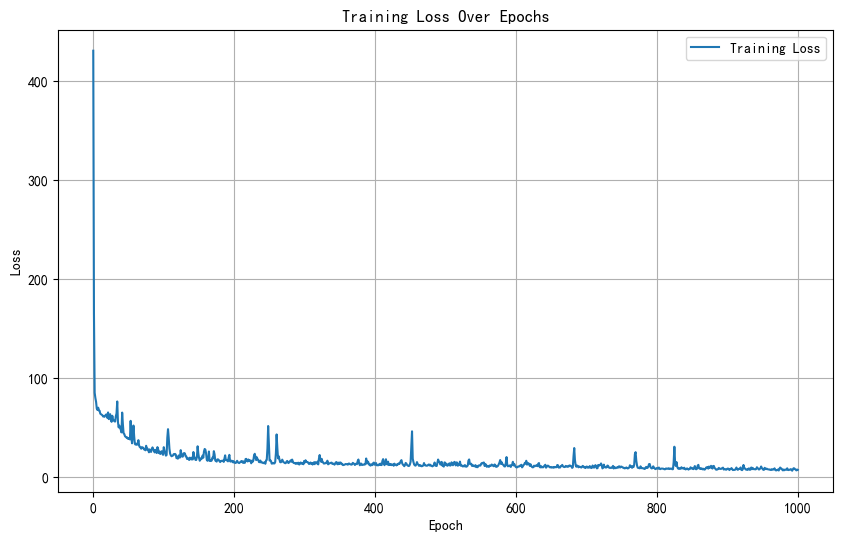

In [46]:
# 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 优化器

# 训练模型
num_epochs = 1000  # 训练轮数
loss_history = []  # 用于记录每个 epoch 的平均损失

for epoch in range(num_epochs):
    epoch_loss = 0.0  # 记录当前 epoch 的总损失
    for inputs, targets in train_loader:
        # 清零梯度
        optimizer.zero_grad()
        # 前向传播
        outputs = model(inputs)
        # 计算损失
        loss = criterion(outputs, targets)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
        epoch_loss += loss.item()  # 累加批次损失

    # 计算当前 epoch 的平均损失
    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)  # 记录平均损失

    # 每 10 个 epoch 输出一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# 绘制损失曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

#### 4.3.2 代码逐行解释

1. **`import torch.nn as nn`**  

   - 导入 PyTorch 的神经网络模块 `nn`，用于定义神经网络层和损失函数（如均方误差损失）。

2. **`import torch.optim as optim`**  

   - 导入 PyTorch 的优化器模块 `optim`，用于定义优化算法（如 Adam 优化器）。

3. **`import matplotlib.pyplot as plt`**  

   - 导入 matplotlib 的绘图模块 `pyplot`，用于绘制训练过程中的损失曲线。

4. **`criterion = nn.MSELoss()`**  

   - 定义损失函数为均方误差（Mean Squared Error, MSE），用于衡量模型预测值与真实值之间的差距。

   - MSE 的数学公式为：
     $$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
     $$
     其中 $y_i$ 是真实值，$\hat{y}_i$ 是预测值，$n$ 是样本数量。

5. **`optimizer = optim.Adam(model.parameters(), lr=0.001)`**  

   - 定义优化器为 Adam（Adaptive Moment Estimation），用于根据梯度更新模型参数。
   - `model.parameters()`：获取模型中所有需要训练的参数（如权重和偏置）。
   - `lr=0.001`：设置学习率（learning rate）为 0.001，控制每次参数更新的步长。

6. **`num_epochs = 1000`**  

   - 定义训练的轮数（epochs）为 1000，即模型将完整遍历训练数据集 1000 次。

7. **`loss_history = []`**  

   - 初始化一个空列表 `loss_history`，用于存储每个 epoch 的平均损失值，以便后续绘制曲线。

8. **`for epoch in range(num_epochs):`**  

   - 开始外层循环，`epoch` 从 0 到 999，控制训练的总轮数。

9. **`epoch_loss = 0.0`**  

   - 初始化变量 `epoch_loss` 为 0，用于累加当前 epoch 中所有批次（batch）的损失。

10. **`for inputs, targets in train_loader:`**  

    - 内层循环，从 `train_loader`（数据加载器）中按批次获取训练数据。
    - `inputs`：当前批次的输入特征张量。
    - `targets`：当前批次的目标值（标签）张量。

11. **`optimizer.zero_grad()`**  

    - 清零优化器中的梯度。每次更新参数前需要清零，避免上一批次的梯度干扰当前计算。

12. **`outputs = model(inputs)`**  

    - 将输入数据 `inputs` 传入模型，进行前向传播，得到模型的预测值 `outputs`。

13. **`loss = criterion(outputs, targets)`**  

    - 使用定义的损失函数（MSE）计算预测值 `outputs` 与真实值 `targets` 之间的损失。

14. **`loss.backward()`**  

    - 执行反向传播，计算损失对模型参数的梯度。这些梯度将用于参数更新。

15. **`optimizer.step()`**  

    - 根据计算得到的梯度，使用 Adam 优化算法更新模型参数。

16. **`epoch_loss += loss.item()`**  

    - 将当前批次的损失值累加到 `epoch_loss` 中。
    - `loss.item()`：将损失张量转换为普通的 Python 浮点数。

17. **`avg_loss = epoch_loss / len(train_loader)`**  

    - 计算当前 epoch 的平均损失：用总损失 `epoch_loss` 除以批次数量 `len(train_loader)`。
    - `len(train_loader)` 表示训练数据被分成多少个批次。

18. **`loss_history.append(avg_loss)`**  

    - 将当前 epoch 的平均损失 `avg_loss` 添加到 `loss_history` 列表中，用于后续绘图。

19. **`if (epoch + 1) % 10 == 0:`**  

    - 判断条件：每 10 个 epoch 执行一次后续操作。
    - `(epoch + 1)`：将 epoch 从 1 开始计数，便于阅读。

20. **`plt.figure(figsize=(10, 6))`**  

    - 创建一个新的图形窗口，设置大小为 10 英寸宽、6 英寸高。

21. **`plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')`**  

    - 绘制折线图：
      - x 轴：epoch 编号，从 1 到 1000（`range(1, num_epochs + 1)`）。
      - y 轴：每个 epoch 的平均损失值（`loss_history`）。
      - `label='Training Loss'`：为曲线设置图例标签。

22. **`plt.title('Training Loss Over Epochs')`**  

    - 设置图表的标题为 "Training Loss Over Epochs"，描述训练损失随 epoch 变化。

23. **`plt.legend()`**  

    - 显示图例，标注曲线为 "Training Loss"。

24. **`plt.grid(True)`**  

    - 在图表上添加网格线，提高可读性。

#### 4.3.3 详细分析

- **损失记录的实现**

  - **方法**：代码在每个 epoch 结束时计算并记录平均损失（`avg_loss`），而不是只记录最后一个批次的损失。

  - **优点**：平均损失能更全面地反映模型在整个训练集上的表现，避免单个批次损失的波动影响判断。

  - **计算过程**：
    - `epoch_loss` 累加所有批次的损失。
    - `avg_loss = epoch_loss / len(train_loader)` 计算平均值。
    - `loss_history.append(avg_loss)` 保存结果。

- **损失曲线的意义**

  - **收敛性判断**：通过观察损失曲线，可以判断模型是否在学习。
    - 如果损失持续下降并趋于平稳，说明模型在逐步收敛。
    - 如果损失波动较大或不下降，可能需要调整学习率或检查数据质量。

  - **过拟合检测**：当前代码只记录训练损失。若引入验证集并记录验证损失，当训练损失下降而验证损失上升时，可能表明模型过拟合。

  - **超参数优化**：损失曲线的形状可以指导超参数调整。例如：
    - 如果损失下降太慢，可以尝试增大学习率。
    - 如果损失震荡，可以减小学习率或增加 batch size。

- **训练过程的关键步骤**

  - **前向传播**：`outputs = model(inputs)`，模型根据当前参数预测输出。

  - **损失计算**：`loss = criterion(outputs, targets)`，衡量预测与真实的差距。

  - **反向传播和优化**：`loss.backward()` 和 `optimizer.step()`，根据梯度更新参数。

  - **梯度清零**：`optimizer.zero_grad()`，确保每次计算的梯度不被历史数据干扰。

  - **Adam 优化器**：  

    - 结合动量法和 RMSProp，利用梯度的一阶矩（均值）和二阶矩（方差）自适应调整学习率。

    - 公式（简化为概念）：
      $$
      w = w - \eta \cdot \frac{\hat{m}}{\sqrt{\hat{v}} + \epsilon}
      $$

      - $\eta$：学习率，$\hat{m}$：动量，$\hat{v}$：速度。

- **改进方案**

  - **添加验证集**：在训练过程中引入验证集，记录并绘制验证损失，评估模型的泛化能力。

  - **早停机制（Early Stopping）**：如果验证损失在若干 epoch 内不再下降，提前终止训练，避免过拟合。

  - **学习率调度**：动态调整学习率。例如，若损失停滞，可以减小学习率（如使用 `torch.optim.lr_scheduler`）。

  - **批量规范化（Batch Normalization）**：在模型中添加 BatchNorm 层，加速收敛并提高稳定性。


### 4.4 测试模型并可视化

#### 4.4.1 代码实现

神经网络测试集 MSE: 13.5596


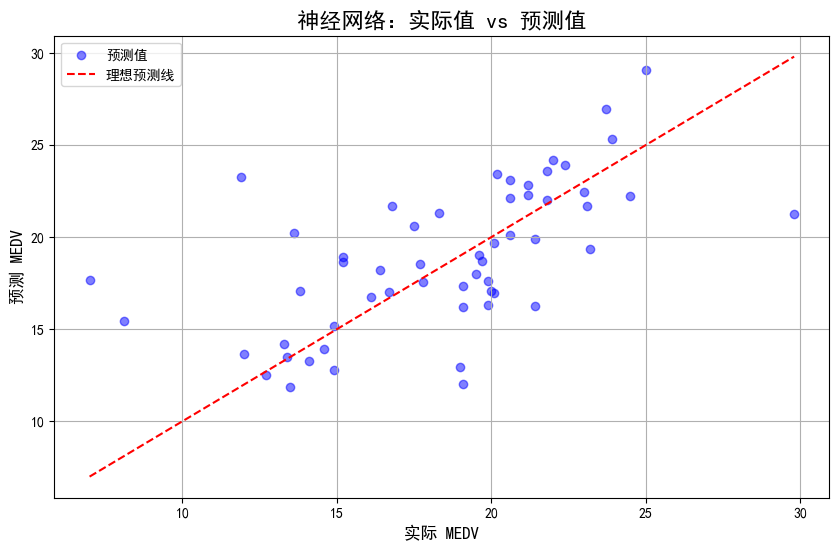

In [49]:
# 测试模型
model.eval()  # 切换到评估模式
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'神经网络测试集 MSE: {test_loss.item():.4f}')

# 转换为 numpy 以便绘图
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

# 绘制预测值与实际值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5, color='blue', label='预测值')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 
         'r--', label='理想预测线')
plt.xlabel('实际 MEDV', fontsize=12)
plt.ylabel('预测 MEDV', fontsize=12)
plt.title('神经网络：实际值 vs 预测值', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

#### 4.4.2 代码逐行解释

1. **`model.eval()`**  
   - 将模型切换到评估模式，关闭训练时的随机性（如 dropout）。

2. **`with torch.no_grad():`**  
   - 在测试时禁用梯度计算，减少内存使用。

3. **`y_pred = model(X_test_tensor)`**  
   - 对测试集进行前向传播，预测房价。

4. **`test_loss = criterion(y_pred, y_test_tensor)`**  
   - 计算测试集的 MSE。

5. **`print(f'神经网络测试集 MSE: {test_loss.item():.4f}')`**  
   - 输出测试集 MSE。

6. **`y_test_np = y_test_tensor.numpy()`**  
   - 将测试集真实值转换为 numpy 数组，用于绘图。

7. **`y_pred_np = y_pred.numpy()`**  
   - 将预测值转换为 numpy 数组。

8. **`plt.figure(figsize=(10, 6))`**  
   - 创建画布，大小 10x6 英寸。

9. **`plt.scatter(y_test_np, y_pred_np, alpha=0.5, color='blue', label='预测值')`**  
   - 绘制散点图：
     - x 轴：真实值，y 轴：预测值。
     - `alpha=0.5`：透明度，显示重叠点。
     - `color='blue'`：蓝色点。
     - `label='预测值'`：图例标签。

10. **`plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--', label='理想预测线')`**  
    - 绘制红虚线（y=x），表示理想预测（即预测值等于真实值）。



#### 4.4.3 详细分析

- **目的**：评估神经网络在测试集上的性能，检查预测值与实际值的吻合程度。

- **MSE 解读**：MSE 越小，模型预测越准确。这里的 MSE约为 14 表示平均每个预测值的平方误差为 14（单位：千美元平方）。

- **散点图解读**：  
  - 点接近红虚线，表明预测准确。
  - 点偏离红虚线较多，表明模型误差较大。
  - 图中大部分点沿 y=x 分布，少数点偏离，可能对应异常值或模型未捕捉的模式。


## 5. 对比方法：线性回归

### 5.1 代码实现

线性回归测试集 MSE: 11.4070


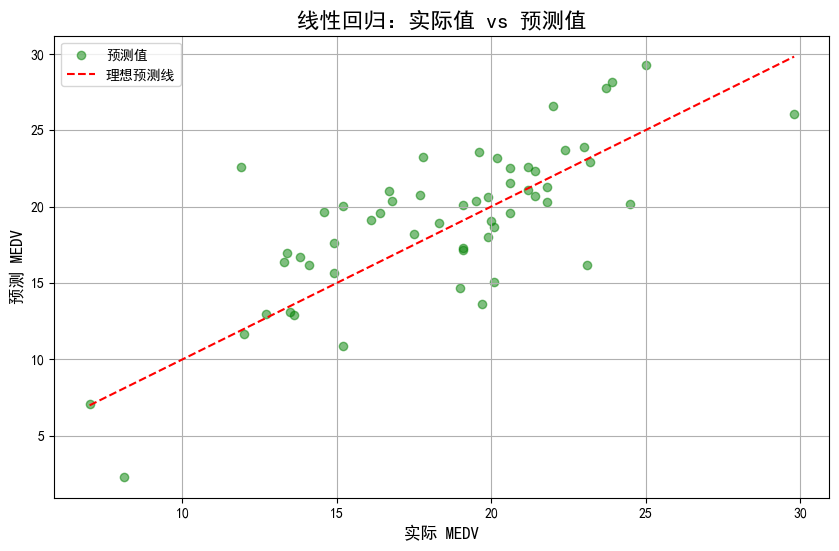

In [52]:
# 导入线性回归库
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 训练线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 预测
y_pred_lr = lr_model.predict(X_test)

# 计算均方误差
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'线性回归测试集 MSE: {mse_lr:.4f}')

# 绘制预测值与实际值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='green', label='预测值')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', label='理想预测线')
plt.xlabel('实际 MEDV', fontsize=12)
plt.ylabel('预测 MEDV', fontsize=12)
plt.title('线性回归：实际值 vs 预测值', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

### 5.2 代码逐行解释

1. **`from sklearn.linear_model import LinearRegression`**  
   - 导入 scikit-learn 的线性回归类。

2. **`from sklearn.metrics import mean_squared_error`**  
   - 导入 MSE 计算函数。

3. **`lr_model = LinearRegression()`**  
   - 实例化线性回归模型。

4. **`lr_model.fit(X_train, y_train)`**  
   - 使用训练集拟合模型，计算权重 $w$ 和偏置 $b$ 。

5. **`y_pred_lr = lr_model.predict(X_test)`**  
   - 对测试集进行预测，返回 numpy 数组。

6. **`mse_lr = mean_squared_error(y_test, y_pred_lr)`**  
   - 计算测试集 MSE。

7. **`print(f'线性回归测试集 MSE: {mse_lr:.4f}')`**  
   - 输出 MSE。

8. **绘图部分**  
   - 与神经网络类似，仅颜色改为绿色（`color='green'`），标题改为“线性回归”。

### 5.3 详细分析

- **线性回归原理**：  

  - 模型形式：
    $$
    \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_{13} x_{13}
    $$

  - 目标：最小化训练集上的平方误差：
    $$
    \min \sum (y_i - \hat{y}_i)^2
    $$

  - 通过解析解（正规方程）或梯度下降求解。

- **与神经网络对比**：  

  - 线性回归假设特征与目标呈线性关系，计算简单但无法捕捉非线性模式。
  - 神经网络通过多层结构和非线性激活函数，能建模复杂关系，但计算成本高。

- **预期结果**：神经网络 MSE=13.5596，而线性回归 MSE 为 11.4070，本次作业还是线性回归更优。


## 6. 特征降维：主成分分析 (PCA)

### 6.1 代码实现

PCA Epoch [10/1000], Loss: 44.5086
PCA Epoch [20/1000], Loss: 9.0993
PCA Epoch [30/1000], Loss: 38.3535
PCA Epoch [40/1000], Loss: 7.4280
PCA Epoch [50/1000], Loss: 18.3437
PCA Epoch [60/1000], Loss: 6.4117
PCA Epoch [70/1000], Loss: 9.2286
PCA Epoch [80/1000], Loss: 2.4297
PCA Epoch [90/1000], Loss: 7.4929
PCA Epoch [100/1000], Loss: 6.4703
PCA Epoch [110/1000], Loss: 2.8045
PCA Epoch [120/1000], Loss: 83.0548
PCA Epoch [130/1000], Loss: 87.4647
PCA Epoch [140/1000], Loss: 39.3744
PCA Epoch [150/1000], Loss: 5.3873
PCA Epoch [160/1000], Loss: 3.5782
PCA Epoch [170/1000], Loss: 27.0860
PCA Epoch [180/1000], Loss: 12.9223
PCA Epoch [190/1000], Loss: 0.6576
PCA Epoch [200/1000], Loss: 64.1462
PCA Epoch [210/1000], Loss: 2.2867
PCA Epoch [220/1000], Loss: 0.3754
PCA Epoch [230/1000], Loss: 0.4412
PCA Epoch [240/1000], Loss: 0.7311
PCA Epoch [250/1000], Loss: 4.2013
PCA Epoch [260/1000], Loss: 23.5360
PCA Epoch [270/1000], Loss: 5.7903
PCA Epoch [280/1000], Loss: 9.9024
PCA Epoch [290/1000

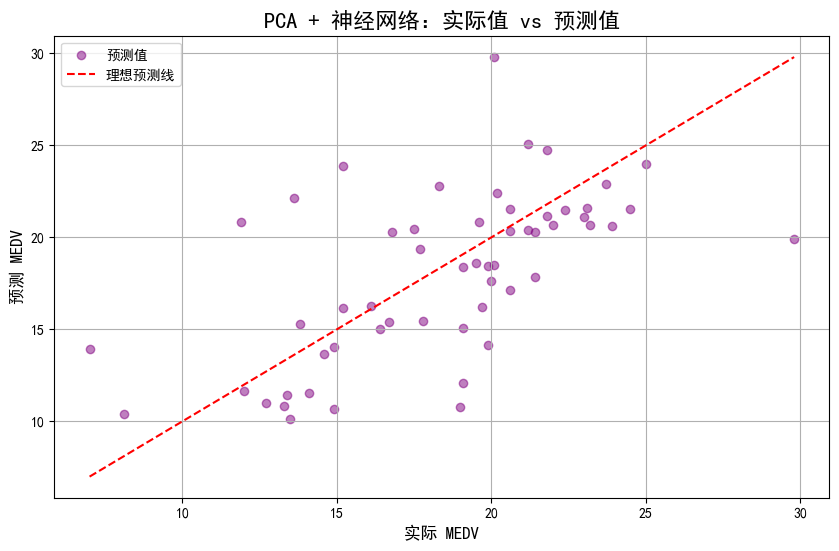

In [ ]:
# 导入 PCA
from sklearn.decomposition import PCA

# 应用 PCA，保留 10 个主成分，选择理由是：除了房价，其他特征都可以用 PCA 降维，13个特征中保留 10 个主成分可以更好地捕捉到房价的主要特征
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 转换为 PyTorch 张量
X_train_pca_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_pca_tensor = torch.tensor(X_test_pca, dtype=torch.float32)

# 创建数据加载器
train_dataset_pca = TensorDataset(X_train_pca_tensor, y_train_tensor)
train_loader_pca = DataLoader(train_dataset_pca, batch_size=32, shuffle=True)

# 初始化 PCA 模型
model_pca = RegressionNet(10)  # 输入维度为 10
optimizer_pca = optim.Adam(model_pca.parameters(), lr=0.001)

# 训练 PCA 模型
for epoch in range(num_epochs):
    for inputs, targets in train_loader_pca:
        optimizer_pca.zero_grad()
        outputs = model_pca(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer_pca.step()
    if (epoch + 1) % 10 == 0:
        print(f'PCA Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试 PCA 模型
model_pca.eval()
with torch.no_grad():
    y_pred_pca = model_pca(X_test_pca_tensor)
    test_loss_pca = criterion(y_pred_pca, y_test_tensor)
    print(f'PCA + 神经网络测试集 MSE: {test_loss_pca.item():.4f}')

# 绘制对比图
y_pred_pca_np = y_pred_pca.numpy()
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred_pca_np, alpha=0.5, color='purple', label='预测值')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 
         'r--', label='理想预测线')
plt.xlabel('实际 MEDV', fontsize=12)
plt.ylabel('预测 MEDV', fontsize=12)
plt.title('PCA + 神经网络：实际值 vs 预测值', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

### 6.2 代码逐行解释

1. **`from sklearn.decomposition import PCA`**  
   - 导入 PCA 类。

2. **`pca = PCA(n_components=5)`**  
   - 实例化 PCA，保留 10 个主成分。

3. **`X_train_pca = pca.fit_transform(X_train)`**  
   - 对训练集拟合 PCA 并转换，得到降维后的特征。

4. **`X_test_pca = pca.transform(X_test)`**  
   - 对测试集应用相同的 PCA 变换。

5. **张量转换和数据加载**  
   - 与之前类似，但输入维度变为 10。

6. **`model_pca = RegressionNet(10)`**  
   - 初始化新模型，输入维度为 10。

7. **训练和测试**  
   - 与神经网络训练类似，仅数据和模型不同。

8. **绘图**  
   - 颜色改为紫色（`color='purple'`），标题调整。

### 6.3 详细分析

- **PCA 原理**：  
  - 将原始 13 个特征投影到 10 个主成分，保留数据最大方差方向。
  - 主成分是特征的线性组合，彼此正交。

- **降维效果**：  
  - 减少计算量，可能降低过拟合风险，但可能丢失部分信息。
  - 可通过 `pca.explained_variance_ratio_` 查看保留的方差比例。

- **预期结果**：  
  - 原始神经网络 MSE=13.5596，加上 PCA 后为 15.4354，略高但相差不大。


## 7. 总结与结果分析

### 7.1 结果表格


| 方法           | 测试集 MSE（均方误差） |
| -------------- | -------------------- |
| 全连接神经网络 | 13.5596              |
| 线性回归       | 11.4070              |
| PCA + 神经网络 | 15.4354              |


### 7.2 详细分析

- **全连接神经网络**：  
  - 优点：捕捉非线性关系，MSE 次低。
  - 缺点：参数多，可能过拟合。

- **线性回归**：  
  - 优点：简单高效，调用的是scikit-learn库，已经是很成熟的机器学习算法，MSE 最低。
  - 缺点：假设线性关系，假设不一定合理，可能在某些情况下不适用。

- **PCA + 神经网络**：  
  - 优点：降维减少计算量，泛化能力可能更强。
  - 缺点：信息损失导致 MSE 略升，这也造成了在三种方法中，该方法的 MSE 最高。

### 7.3 综合比较与洞察

- **MSE 对比**：
  - 线性回归（11.4070） < 全连接神经网络（13.5596） < PCA + 神经网络（15.4354）。
  - 线性回归表现最佳，表明波士顿房价数据的特征与目标变量关系可能较为简单，线性模型足以胜任。
  - 神经网络的复杂性未转化为性能提升，PCA 的降维反而导致信息损失。
- **模型选择建议**：
  - **数据特性**：若数据关系接近线性，优先选择线性回归；若非线性关系显著，可尝试神经网络。
  - **计算资源**：资源有限时，线性回归或 PCA 降维后的模型更高效。
  - **可解释性**：需要解释模型时，线性回归优于神经网络。
  - **数据规模**：大数据量下，神经网络可能更有优势；小数据量时，简单模型更稳健。

### 7.4 改进想法

- **特征工程**：为线性回归添加交互特征或多项式特征，提升其对非线性关系的捕捉能力。
- **正则化**：在神经网络中引入 L2 正则化或 dropout，减少过拟合风险。
- **超参数优化**：通过网格搜索或随机搜索调整神经网络的层数、神经元数量和学习率。
- **集成方法**：尝试随机森林或梯度提升树等集成学习方法，进一步提升预测性能。

### 7.5总结

在波士顿房价数据集上，线性回归以最低的 MSE（11.4070）表现出色，体现出其简单性和对数据的良好拟合能力。全连接神经网络（MSE 13.5596）因过拟合略逊一筹，而 PCA + 神经网络（MSE 15.4354）则因信息损失表现最差。这提示我们在模型选择时，应根据数据特性和任务需求权衡复杂性与性能。未来可通过特征工程、正则化和超参数调优进一步优化结果。